

# swr_df.csv description:
* Each row represents a unique sharp wave ripple event
* each column represents a feature of each sharp wave ripple
* Columns:
    * start_time:  start time of ripple
    * end_time: end time of ripple
    * ripple_duration: how long was the ripple in seconds
    * max_emg: emg contamination at time of ripple
    * peak_time: time that the ripple was maximized
    * peak_channel: channel that maximized the ripple
    * peak_amplitude: zscored ripple amplitude
    * peak_freq: frequency of ripple
    * clipped: percent of ripple that is clipped or flatlined
    * session: recording session identification
    * area: brain area were ripple occured (ca1,ca3,cortex)
    * ep_type: epoch type where each ripple occured
    * group: group identification
    * rat: rat ID
    
## Nested diagram

* group
    * rat
        * session
            * epoch
                * ripple event

For our current purposes, epoch can be ignored as we just want to see if features of sharp wave ripples are similar between groups

In [3]:
library(tidyverse)
library(lme4)
library(lmerTest)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'Matrix'

The fo

### Load data and only keep hippocampal sessions

In [4]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/swr_df.csv')

df_inter_ripple = read.csv('F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/df_ripple_rate.csv')

# only keep hippocampal events
idx <- data$area == 'cortex'
data = data[!idx,]
print(summary(data))

idx <- df_inter_ripple$area == 'cortex'
df_inter_ripple = df_inter_ripple[!idx,]
print(summary(df_inter_ripple))

       X         ripple_number      start_time        end_time       
 Min.   :    0   Min.   :   0.0   Min.   :   0.0   Min.   :   0.239  
 1st Qu.: 4984   1st Qu.: 173.0   1st Qu.: 691.7   1st Qu.: 691.734  
 Median : 9568   Median : 393.0   Median :1707.5   Median :1707.588  
 Mean   : 9504   Mean   : 573.3   Mean   :1740.3   Mean   :1740.425  
 3rd Qu.:14144   3rd Qu.: 850.0   3rd Qu.:2562.8   3rd Qu.:2563.027  
 Max.   :18732   Max.   :3665.0   Max.   :6172.0   Max.   :6172.226  
                                                                     
 ripple_duration     max_emg          peak_time         peak_channel 
 Min.   :0.0248   Min.   :-0.0709   Min.   :   0.002   Min.   : 0.0  
 1st Qu.:0.0720   1st Qu.: 0.3041   1st Qu.: 691.690   1st Qu.: 3.0  
 Median :0.1048   Median : 0.4092   Median :1707.578   Median : 6.0  
 Mean   :0.1227   Mean   : 0.4579   Mean   :1740.365   Mean   :13.6  
 3rd Qu.:0.1512   3rd Qu.: 0.5644   3rd Qu.:2562.897   3rd Qu.:17.0  
 Max.   :0.9864   Ma

### label factors as factors

In [5]:
data$group = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$ep_type = factor(data$ep_type, levels=c('pedestal_1', 'track','pedestal_2','cylinder_1','pedestal_3','cylinder_2','pedestal_4'))
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

df_inter_ripple$group = factor(df_inter_ripple$group, levels=c('control', 'pae'))
df_inter_ripple$rat = factor(df_inter_ripple$rat)
df_inter_ripple$session = factor(df_inter_ripple$session)
df_inter_ripple$area = factor(df_inter_ripple$area, levels=c('ca1', 'ca3'))

### Lets look at numbers of ripples per group, rat, and area

In [6]:
print('ripple df')
xtabs(~group+rat+area,data=data)


[1] "ripple df"


, , area = ca1

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS17 LS19 LS23 RH13
  control     722     263       0       0    2300       0    0    0  120    3
  pae           0       0     933       0       0       0   89  233    0    0
         rat
group     RH14 RH16
  control    1    0
  pae        0   34

, , area = ca3

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS17 LS19 LS23 RH13
  control     765     189       0       0    5113       0    0    0    0    8
  pae           0       0     644    2498       0    4117    0    0    0    0
         rat
group     RH14 RH16
  control    9    0
  pae        0    0


In [7]:
print('df_inter_ripple')
xtabs(~group+rat+area,data=df_inter_ripple)

[1] "df_inter_ripple"


, , area = ca1

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS17 LS19 LS23 RH13
  control      12       5       0       0       7       0    0    0    4    1
  pae           0       0      23       0       0       0    6   15    0    0
         rat
group     RH14 RH16
  control    1    0
  pae        0    7

, , area = ca3

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS17 LS19 LS23 RH13
  control      18       7       0       0      21       0    0    0    0    3
  pae           0       0      15      36       0      22    0    0    0    0
         rat
group     RH14 RH16
  control    1    0
  pae        0    0


### plot distributions of variables of interests

Split data into rat by region

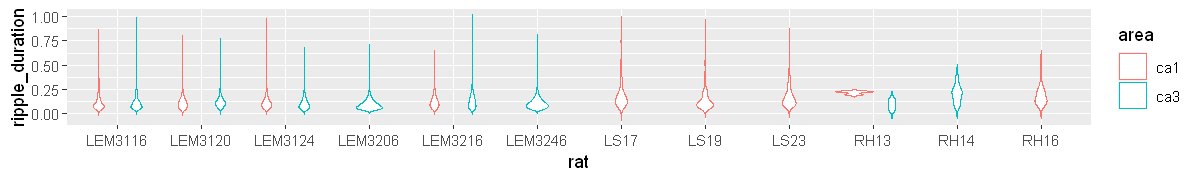

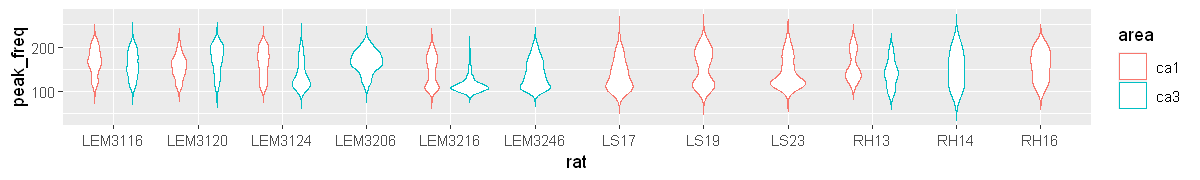

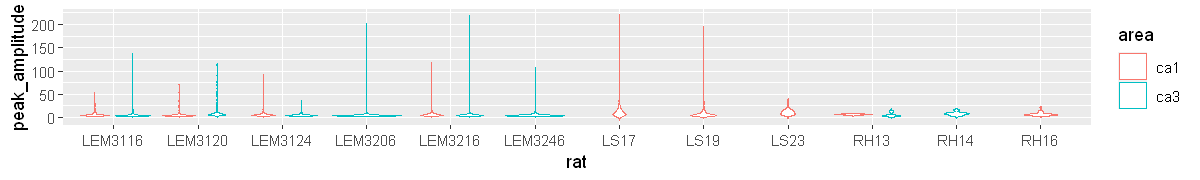

In [16]:
options(repr.plot.width = 10, repr.plot.height = 1.5)

p<-ggplot(data, aes(x=rat, y=ripple_duration, color=area)) +
    geom_violin(trim=FALSE)
p

p<-ggplot(data, aes(x=rat, y=peak_freq, color=area)) +
    geom_violin(trim=FALSE)
p

p<-ggplot(data, aes(x=rat, y=peak_amplitude, color=area)) +
    geom_violin(trim=FALSE)
p

In [64]:
summary(df_inter_ripple)

       X                             session     area         counts      
 Min.   :  0.00   LEM3124_S20190307132509:  2   ca1: 81   Min.   :  1.00  
 1st Qu.: 57.75   LEM3124_S20190307163732:  2   ca3:123   1st Qu.: 10.00  
 Median :118.50   LEM3124_S20190309145324:  2             Median : 33.00  
 Mean   :113.93   LEM3124_S20190311161641:  2             Mean   : 88.44  
 3rd Qu.:169.25   LEM3124_S20190315160017:  2             3rd Qu.: 79.25  
 Max.   :220.00   LEM3124_S20190319154019:  2             Max.   :983.00  
                  (Other)                :192                             
  ripple_rate           group          rat    
 Min.   :0.000521   control: 80   LEM3124:38  
 1st Qu.:0.012210   pae    :124   LEM3206:36  
 Median :0.036449                 LEM3116:30  
 Mean   :0.074858                 LEM3216:28  
 3rd Qu.:0.082028                 LEM3246:22  
 Max.   :0.481211                 LS19   :15  
                                  (Other):35  

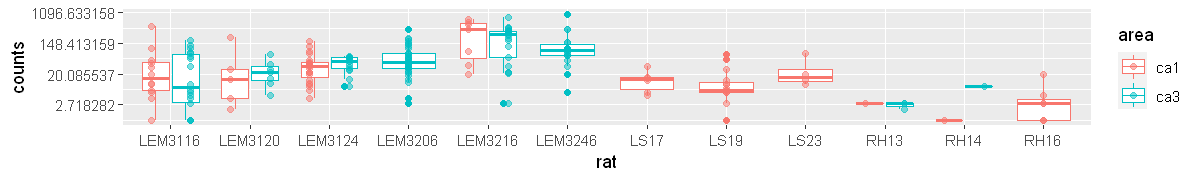

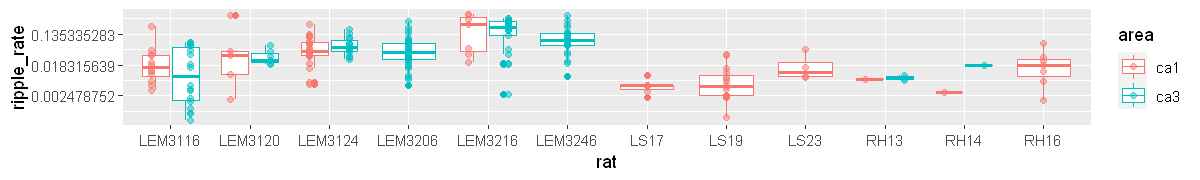

In [82]:
options(repr.plot.width = 10, repr.plot.height = 1.5)

p<-ggplot(df_inter_ripple, aes(x=rat, y=counts, color=area)) +
    geom_boxplot() +
    geom_jitter(position=position_dodge(1),alpha=.5) +
    scale_y_continuous(trans='log')
p

p<-ggplot(df_inter_ripple, aes(x=rat, y=ripple_rate, color=area)) +
    geom_boxplot() +
    geom_jitter(position=position_dodge(1),alpha=.5) +
    scale_y_continuous(trans='log')
p

### run linear effect model where sessions are nested within rats

ca1 ripple duration

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,7232.960,7258.780,-3612.480,7224.960,NA,NA,NA
m1,5,7234.949,7267.224,-3612.475,7224.949,0.01116902,1,0.9158334


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: ripple_duration_log ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
  7234.9   7267.2  -3612.5   7224.9     4693 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2586 -0.6653 -0.0337  0.6538  3.7855 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.047798 0.21863 
 rat         (Intercept) 0.009308 0.09648 
 Residual                0.264839 0.51463 
Number of obs: 4698, groups:  session:rat, 81; rat, 10

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) -2.02463    0.06773 10.89859 -29.891 8.29e-12 ***
grouppae     0.01003    0.09414  8.84582   0.107    0.918    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.720

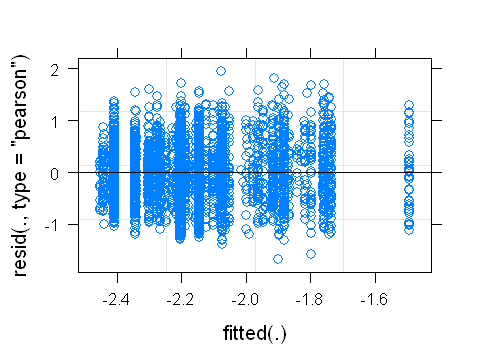

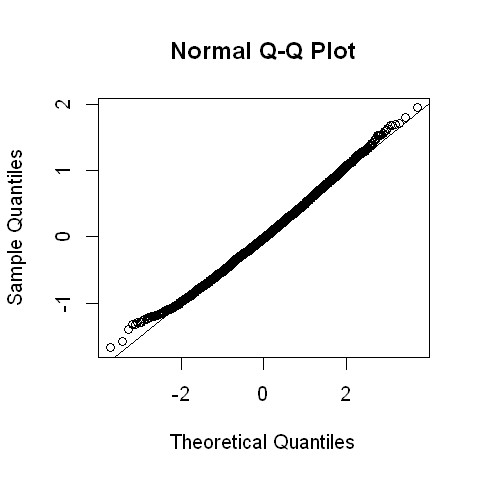

In [52]:
# log transform ripple_duration
data$ripple_duration_log <- log(data$ripple_duration)

m1 = lmer(ripple_duration_log ~ group + (1 | rat/session), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(ripple_duration_log ~ 1 + (1 | rat/session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))



ca3 ripple duration

In [57]:
median(data$ripple_duration[data$area == "ca3" & data$group == "control"])-
    median(data$ripple_duration[data$area == "ca3" & data$group == "pae"])

[1] 0.0232

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,20282.82,20312.82,-10137.41,20274.82,NA,NA,NA
m1,5,20275.31,20312.81,-10132.66,20265.31,9.509663,1,0.002043927


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: ripple_duration_log ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
 20275.3  20312.8 -10132.7  20265.3    13338 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0494 -0.6774  0.0113  0.6756  4.4426 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.019285 0.13887 
 rat         (Intercept) 0.001086 0.03295 
 Residual                0.263295 0.51312 
Number of obs: 13343, groups:  session:rat, 123; rat, 8

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) -2.17421    0.03189  9.42734 -68.171 5.09e-14 ***
grouppae    -0.19755    0.04182  7.03320  -4.723  0.00212 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.763

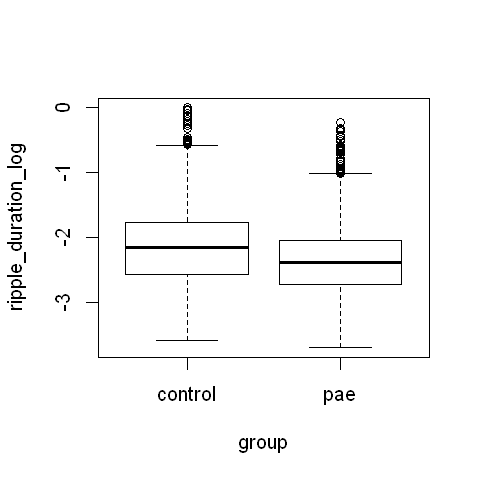

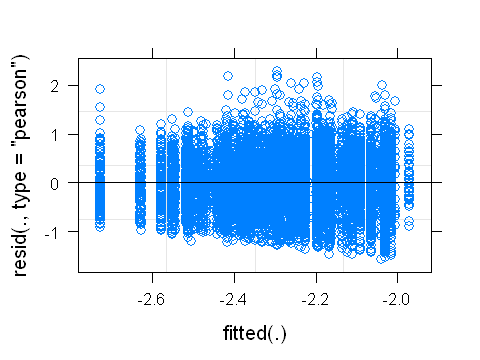

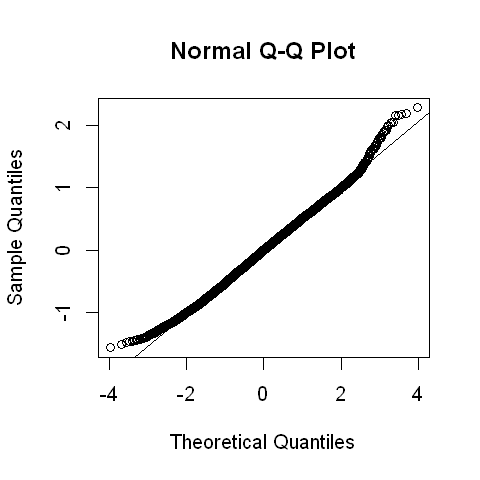

In [51]:
m1 = lmer(ripple_duration_log ~ group + (1 | rat/session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(ripple_duration_log ~ 1 + (1 | rat/session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)
summary(m1)
plot(ripple_duration_log ~ group, data = data[data$area == "ca3",])

options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

ca1 peak frequency

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-9042.748,-9016.929,4525.374,-9050.748,NA,NA,NA
m1,5,-9041.686,-9009.411,4525.843,-9051.686,0.9371914,1,0.3330012


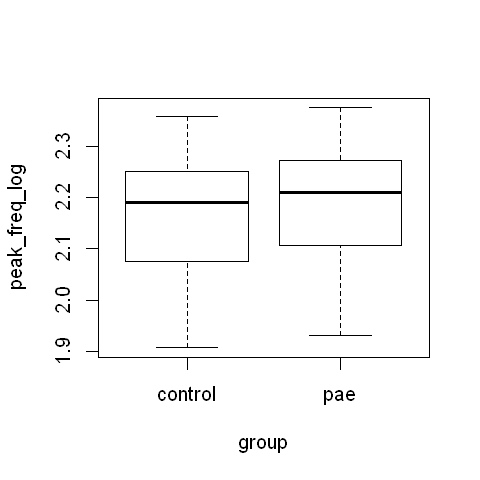

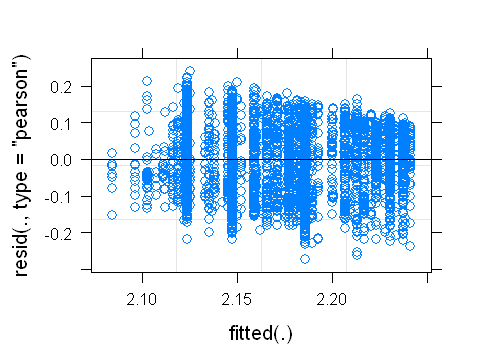

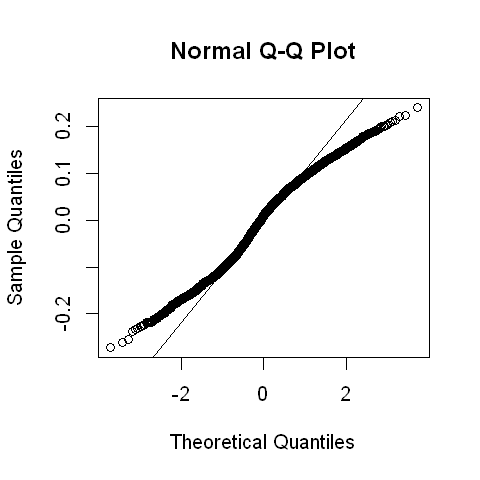

In [48]:
# log transform peak frequency
data$peak_freq_log <- log10(data$peak_freq)


m1 = lmer(peak_freq_log ~ group + (1 | rat/session), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(peak_freq_log ~ 1 + (1 | rat/session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)

plot(peak_freq_log ~ group, data = data[data$area == "ca1",])

options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

ca3 peak frequency

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-32435.19,-32405.19,16221.59,-32443.19,NA,NA,NA
m1,5,-32433.24,-32395.75,16221.62,-32443.24,0.05414031,1,0.8160094


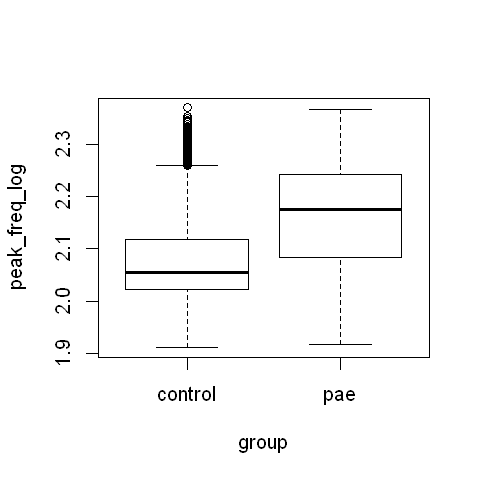

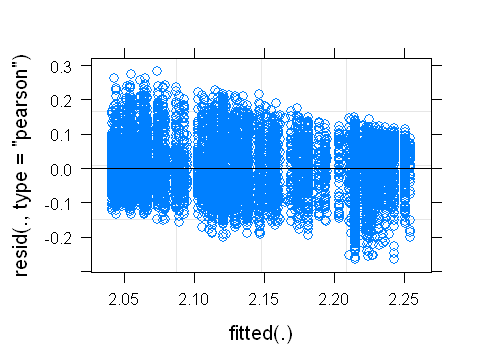

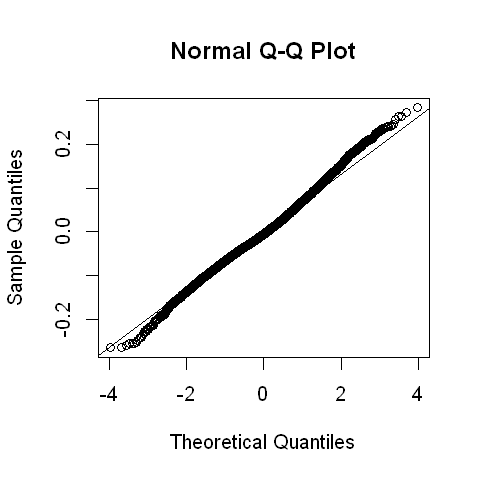

In [49]:
m1 = lmer(peak_freq_log ~ group + (1 | rat/session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(peak_freq_log ~ 1 + (1 | rat/session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)

plot(peak_freq_log ~ group, data = data[data$area == "ca3",])

options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

ca1 peak amplitude

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-8944.553,-8918.733,4476.276,-8952.553,NA,NA,NA
m1,5,-8942.623,-8910.349,4476.312,-8952.623,0.07015655,1,0.791109


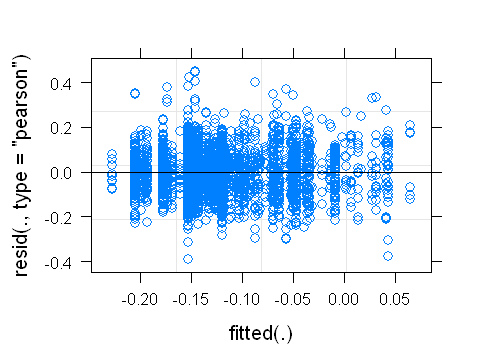

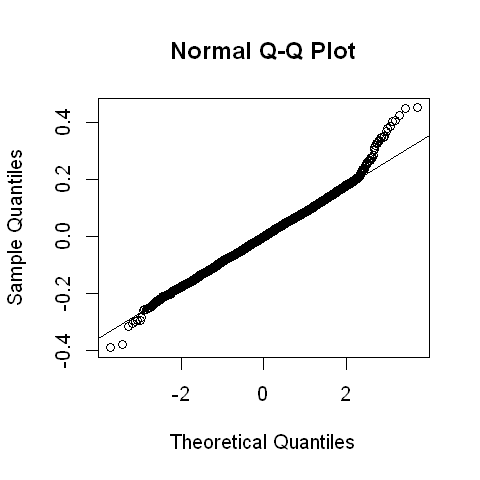

In [35]:
# log transform peak frequency
data$peak_amplitude_log <- log10(log10(data$peak_amplitude))

m1 = lmer(peak_amplitude_log ~ group + (1 | rat/session), data = data[data$area == "ca1",],REML=FALSE)
# summary(m1)
m1.null = lmer(peak_amplitude_log ~ 1 + (1 | rat/session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)

options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))


ca3 peak amplitude

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-25547.80,-25517.80,12777.90,-25555.80,NA,NA,NA
m1,5,-25548.32,-25510.82,12779.16,-25558.32,2.520374,1,0.1123839


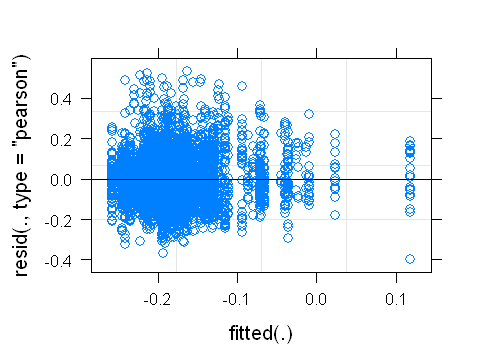

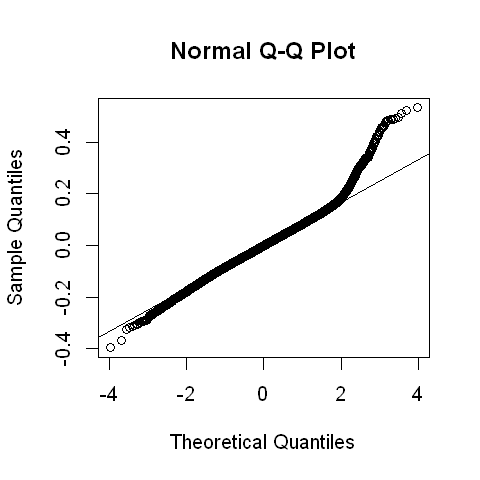

In [36]:
m1 = lmer(peak_amplitude_log ~ group + (1 | rat/session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(peak_amplitude_log ~ 1 + (1 | rat/session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)

options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

In [83]:
summary(df_inter_ripple)

       X                             session     area         counts      
 Min.   :  0.00   LEM3124_S20190307132509:  2   ca1: 81   Min.   :  1.00  
 1st Qu.: 57.75   LEM3124_S20190307163732:  2   ca3:123   1st Qu.: 10.00  
 Median :118.50   LEM3124_S20190309145324:  2             Median : 33.00  
 Mean   :113.93   LEM3124_S20190311161641:  2             Mean   : 88.44  
 3rd Qu.:169.25   LEM3124_S20190315160017:  2             3rd Qu.: 79.25  
 Max.   :220.00   LEM3124_S20190319154019:  2             Max.   :983.00  
                  (Other)                :192                             
  ripple_rate           group          rat    
 Min.   :0.000521   control: 80   LEM3124:38  
 1st Qu.:0.012210   pae    :124   LEM3206:36  
 Median :0.036449                 LEM3116:30  
 Mean   :0.074858                 LEM3216:28  
 3rd Qu.:0.082028                 LEM3246:22  
 Max.   :0.481211                 LS19   :15  
                                  (Other):35  

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,269.3987,276.5821,-131.6994,263.3987,NA,NA,NA
m1,4,270.5331,280.1109,-131.2666,262.5331,0.8656004,1,0.3521762


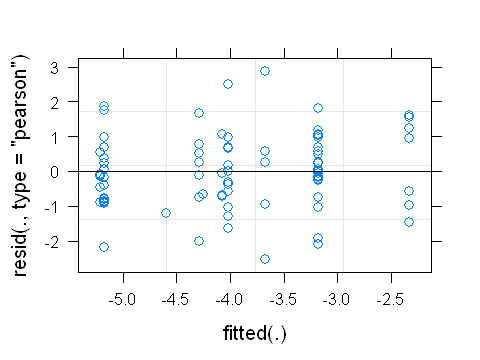

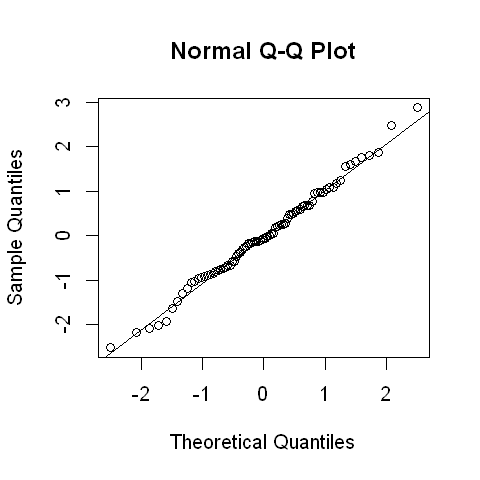

In [9]:
df_inter_ripple$ripple_rate_log = log(df_inter_ripple$ripple_rate)

m1 = lmer(ripple_rate_log ~ group + (1 | rat), data = df_inter_ripple[df_inter_ripple$area == "ca1",],REML=FALSE)
m1.null = lmer(ripple_rate_log ~ 1 + (1 | rat), data = df_inter_ripple[df_inter_ripple$area == "ca1",], REML=FALSE)
anova(m1.null, m1)

options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,399.0621,407.4986,-196.5310,393.0621,NA,NA,NA
m1,4,399.2706,410.5194,-195.6353,391.2706,1.791421,1,0.1807531


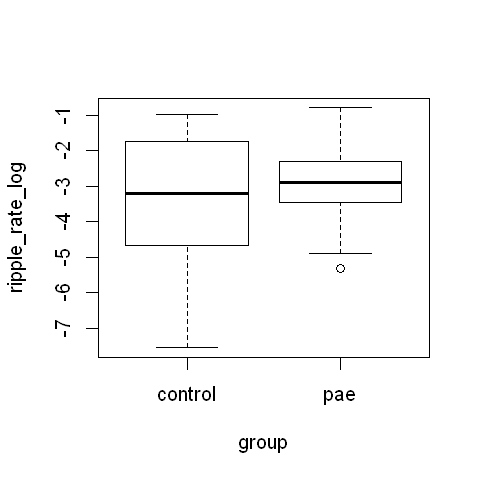

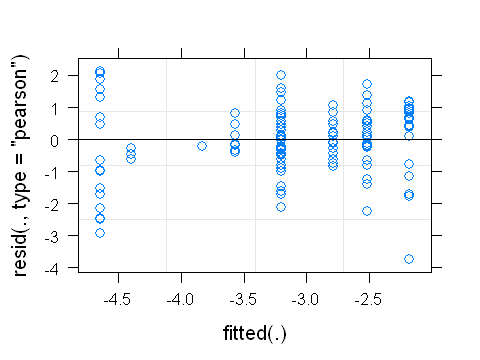

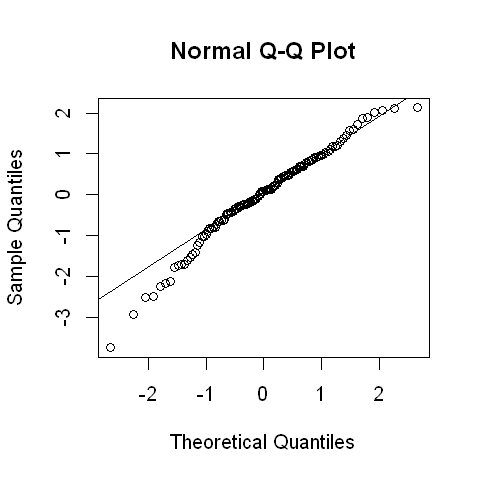

In [50]:
m1 = lmer(ripple_rate_log ~ group + (1 | rat), data = df_inter_ripple[df_inter_ripple$area == "ca3",],REML=FALSE)
m1.null = lmer(ripple_rate_log ~ 1 + (1 | rat), data = df_inter_ripple[df_inter_ripple$area == "ca3",], REML=FALSE)
anova(m1.null, m1)
plot(ripple_rate_log ~ group, data =  df_inter_ripple[df_inter_ripple$area == "ca3",])

options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

In [ ]:
# m1 = lmer(ripple_rate_log ~ group + (1 | rat), data = df_inter_ripple[df_inter_ripple$area == "ca3",],REML=FALSE)
# summary(m1)
# plot(ripple_rate_log ~ group, data = df_inter_ripple[df_inter_ripple$area == "ca3",])
# abline(m1)

